<a href="https://colab.research.google.com/github/aioakiddnh/colab_sample/blob/master/deep_learning/simple_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#シンプルなディープラーニング

##データの読み込み

Irisデータセットを読み込みます。  
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [1]:
import numpy as np
from sklearn import datasets #今回使うデータが入っている。

iris = datasets.load_iris()
print(iris.data[:10]) #最初の10個 #読み込んだirisのデータ #各行が各花に対応 [がくの幅と長さ、花びらの幅と長さ]
print(iris.target[:10]) #品種(0, 1, 2)
print(iris.data.shape) #データの形状 (行、列)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]
(150, 4)


## データの前処理
データの前処理として、標準化を行います。  
標準化は、平均値が0、標準偏差が1になるように変換する処理です。  
https://scikit-learn.org/stable/modules/preprocessing.html  
  
ラベルをone-hot表現に変換します。  
one-hot表現は、一箇所だけ1で残りは０の配列です。  
https://keras.io/ja/utils/np_utils/

In [2]:
from sklearn import preprocessing #前処理
from keras.utils import np_utils # kerasのユーティリティーズからnumpyのユーティリティーズを読み込む

scaler = preprocessing.StandardScaler() #スケーラーをつくる

# 前回組み込んだirisのデータに対してfitを行う。
# これにより標準化のためのパラメータが計算される。
# StandardScaler()は標準化のために使われる。
# 標準化とはデータから平均値を引いて、標準偏差で割ったもの。こうすることで、データの平均値が0になり、標準偏差が1になる。
# このような処理をすることでニューラルネットワークが学習しやすくなる。
scaler.fit(iris.data) 

x = scaler.transform(iris.data) # iris.dataを標準化したものがxに入る。
print(x[:10]) # 最初の10個を表示

# 正解データ
# ラベルのデータをone-hot表現に変換
# one-hot表現とは、1か所だけ1でそれ以外は0の配列
t = np_utils.to_categorical(iris.target)
print(t[:10])

Using TensorFlow backend.


[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


## 訓練データとテストデータ
データを訓練用のデータとテスト用のデータに分割します。  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [3]:
from sklearn.model_selection import train_test_split #訓練データとテストデータに分割していく。

# 入力x, 正解t
# train_size=0.75：入力の75%をトレーニングデータに、残りの25%をテスト用データに
# train_test_splitの返り値は4つのデータが入ったタプル
# x_train：訓練用の入力データ
# t_train：訓練用の正解
# x_test：テスト用の入力データ
# x_train：テスト用の正解
x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)
print(x_train.shape)
print(x_test.shape)

(112, 4)
(38, 4)


## モデルの構築  
4層からなる、シンプルなディープラーニングのモデルを構築します。  
**Sequentilal**: 単純に層を積み重ねるモデル  
https://keras.io/ja/models/sequential/

**Dense**: 全結合層  
https://keras.io/ja/layers/core/#dense  

**Activation**: 活性化関数  
https://keras.io/ja/layers/core/#activation  

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

# 中間層のニューロンが32、input_dim：入力層のニューロンの数=4(特徴量が4つのため)
# Dense：全結合層、前の層と次の層が全て接続されている層
model.add(Dense(32, input_dim=4)) 

# reluは活性化関数の1つ。
# ニューロンへの入力と重みの積の総和にバイアスを足したものを活性化関数に入れる。
# reluは層の数が増えて行っても、勾配消失問題が起きづらい優れた活性化関数。
# 中間層を追加するときは、DenseとActivationは別々に追加する。
model.add(Activation('relu')) 

model.add(Dense(32)) #中間層で、入力は受け取らないので、input_dimは不要
model.add(Activation('relu'))

model.add(Dense(3)) #3種類の花に分類するため、最後の層のニューロン数は3になる。
model.add(Activation('softmax'))

# コンパイルをしないとこのモデルを使うことが出来ない。
# optimizer：最適化アルゴリズム
# loss：損失関数、出力と正解の誤差を定義するのにどのような関数を使うか
  # categorical_crossentropy：交差エントロピー
# metrix=['accuracy']：どのような精度が得られたか、後程結果として表示
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                160       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
_________________________________________________________________
activation_3 (Activation)    (None, 3)                 0         
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
____________________________________________________

dense_1 (Dense)          (None, 32)          160  
**32個のニューロンがあって、入力が4で4×32=128**  
**各ニューロンごとにバイアスがあるので、128+32=160**

In [5]:
# x_train：訓練用の入力データ
# t_train：訓練用の正解データ
# nb_epoch：number of epoch,エポックの数（すべての訓練データを一回使い切ると1エポックと数える）
# batch_size：サンプル数のまとまりの数
history = model.fit(x_train, t_train, nb_epoch=30, batch_size=8)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/30
112/112 [==============================] - 0s 828us/step - loss: 1.2447 - accuracy: 0.3214
Epoch 2/30
112/112 [==============================] - 0s 153us/step - loss: 1.1101 - accuracy: 0.3571
Epoch 3/30
112/112 [==============================] - 0s 159us/step - loss: 1.0191 - accuracy: 0.3661
Epoch 4/30
112/112 [==============================] - 0s 159us/step - loss: 0.9470 - accuracy: 0.5804
Epoch 5/30
112/112 [==============================] - 0s 160us/step - loss: 0.8858 - accuracy: 0.7768
Epoch 6/30
112/112 [==============================] - 0s 161us/step - loss: 0.8307 - accuracy: 0.8214
Epoch 7/30
112/112 [==============================] - 0s 173us/step - loss: 0.7789 - accuracy: 0.8125
Epoch 8/30
112/112 [==============================] - 0s 180us/step - loss: 0.7308 - accuracy: 0.8125
Epoch 9/30
112/112 [==============================] - 0s 176us/step - loss: 0.6855 - accuracy: 0.8125
Epoch 10/30
112/112 [==============================] - 0s 159us/step - loss: 0.645

## 学習の推移
Historyには学習の経過が記録されています。  
これを使って、学習の推移を表示します。

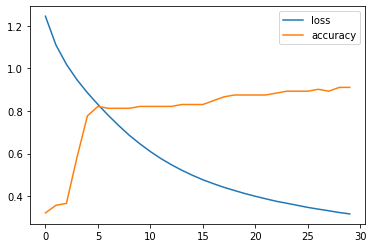

In [6]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']
hist_acc = history.history['accuracy']

# plt.plot(x軸, y軸, ラベル)
plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss') #arange(len(hist_loss))：0からhist_lossの要素の数より一つ小さい数まで整数が並んだ配列を得ることができる。
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy') #精度
plt.legend()
plt.show()

## 評価
モデルの評価を行います。
evaluate: 入力、正解データから誤差などを計算します。
https://keras.io/ja/models/sequential/#evaluate

In [7]:
loss, accuracy = model.evaluate(x_test, t_test) #evaluate：2つの値を基に誤差と精度を計算する、 #x_test：テスト用の入力, t_test：テスト用の正解
print(loss, accuracy)

38/38 [==============================] - 0s 606us/step
0.30506603655062225 0.8684210777282715


誤差：0.30506603655062225           精度：0.8684210777282715

## 予測

In [8]:
model.predict(x_test) #入力を受け取って予測した結果を出力する

array([[0.00701844, 0.13131228, 0.86166924],
       [0.13976595, 0.5378148 , 0.32241932],
       [0.00291733, 0.10505367, 0.89202905],
       [0.02630336, 0.26107916, 0.71261746],
       [0.0286273 , 0.5209446 , 0.45042816],
       [0.97249424, 0.02349752, 0.00400812],
       [0.08925905, 0.6772012 , 0.23353976],
       [0.09492268, 0.7624433 , 0.142634  ],
       [0.05628823, 0.8277238 , 0.11598795],
       [0.16644199, 0.61280376, 0.22075419],
       [0.97261435, 0.02317116, 0.00421447],
       [0.04084596, 0.4109138 , 0.5482402 ],
       [0.96981424, 0.02475891, 0.00542686],
       [0.00695922, 0.11651053, 0.87653023],
       [0.02363691, 0.26299965, 0.7133634 ],
       [0.01504939, 0.3522007 , 0.6327499 ],
       [0.0094143 , 0.16002703, 0.8305587 ],
       [0.00398266, 0.1410325 , 0.8549849 ],
       [0.9775484 , 0.01912059, 0.00333092],
       [0.9449445 , 0.04476363, 0.01029176],
       [0.00786426, 0.18956678, 0.802569  ],
       [0.03114665, 0.88743687, 0.08141639],
       [0.

↑
各行が各出力、それぞれ足すと1になる。これは出力層でソフトマックス関数を使っているので、出力が確率を表しているから。

## 保存

In [9]:
from keras.models import load_model

model.save('model.h5') #保存するファイル名を指定して保存 拡張子'h5'(エッチファイブ)
load_model('model.h5')